In [2]:
import matplotlib.pyplot as plt  # Used for plotting
%matplotlib inline
import pandas as pd  # Home of the DataFrame construct, _the_ most important object for Data Science
import numpy as np
import sys  # Python system library needed to load custom functions
import os
import shutil
import time
from matplotlib.patches import Rectangle  # Allows drawing the bounding boxes of the worm sections
from PIL import Image  # For loading image files
from tqdm import tqdm  # for timing a for loop
import glob
import PIL
from PIL import Image
from tkinter import image_names
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import cv2
import matplotlib
from gc import set_debug
from pprint import pprint
from re import S
import struct
from turtle import color
from cv2 import mean
from scipy.stats import cauchy, logistic
from PIL import ImageMath, ImageColor, ImageEnhance, ImageFilter
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
!pip install scikit-image

     |████████████████████████████████| 12.4 MB 24.0 MB/s            
     |████████████████████████████████| 4.4 MB 82.3 MB/s            
     |████████████████████████████████| 148 kB 76.4 MB/s            


In [4]:
!pip install var_dump

  Preparing metadata (setup.py) ... done
  Created wheel for var-dump: filename=var_dump-1.2-py3-none-any.whl size=3041 sha256=9debf6a38a92159a51b4c9d86e86b99367062fedd11d555bf28fd9bac05c4b50
  Stored in directory: /root/.cache/pip/wheels/da/3e/72/4d3bccbf4564a5c4525751e86956c0b6c153598cd35764ed4d
Successfully built var-dump


In [5]:
from skimage.io import imread, imshow
from skimage import img_as_ubyte
#from skimage.exposure import adjust_gamma, adjust_sigmoid
from skimage.color import rgb2gray
from skimage.exposure import histogram, cumulative_distribution, adjust_gamma, adjust_sigmoid
from var_dump import var_dump

In [10]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=1187d0f177c5e692f332d9f374d6cf502b50d11f5f3c6a5ab83528d2f48577fb
  Stored in directory: /root/.cache/pip/wheels/f5/0c/3a/61b992f7aa85de40f339e6d4970d91dddb103dd0ad6c5d58f2
Successfully built imutils


In [11]:
!pip install docutils
!aws configure list

     |████████████████████████████████| 570 kB 26.8 MB/s            
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.22.24 requires docutils<0.16,>=0.10, but you have docutils 0.18.1 which is incompatible.
      Name                    Value             Type    Location
      ----                    -----             ----    --------
   profile                <not set>             None    None
access_key     ****************JPUH   container-role    
secret_key     ****************lZTv   container-role    
    region                us-east-1              env    AWS_DEFAULT_REGION


In [8]:
!pip install exif

     |████████████████████████████████| 69 kB 17.1 MB/s            


In [9]:
import exif

In [5]:
# sys.path.append('/home/sagemaker-user/gdsc5-tutorials-public/src')
sys.path.append('/home/sagemaker-user/MMDetection')

In [6]:
from Dataset import OnchoDataset
from detection_util import create_predictions
from gdsc_score import get_leaderboard_score
from gdsc_util import download_directory, download_file, load_sections_df, set_up_logging, PROJECT_DIR
from PredictionEvaluator import PredictionEvaluator
import random

set_up_logging()  # Sets up logging to console and the .log file
data_folder = str(PROJECT_DIR / 'data')

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [12]:
section_df = load_sections_df(f'{data_folder}/gdsc_train.csv')
len(section_df)

65687

In [11]:
def getAllFiles(path,extension='jpg'):
    import glob, os
    os.chdir(path)
    return [file for file in glob.glob('*.'+extension)]

In [5]:
def get_file_size(path):
    size = os.path.getsize(path)
    if size < 1024:
        return f"{size} bytes"
    elif size < 1024*1024:
        return f"{round(size/1024, 2)} KB"
    elif size < 1024*1024*1024:
        return f"{round(size/(1024*1024), 2)} MB"
    elif size < 1024*1024*1024*1024:
        return f"{round(size/(1024*1024*1024), 2)} GB"

In [6]:
def get_folder_size(path):
    size = 0
    for path, dirs, files in os.walk(path):
        for f in files:
            fp = os.path.join(path, f)
            size += os.stat(fp).st_size
   
    if size < 1024:
        return f"{size} bytes"
    elif size < 1024*1024:
        return f"{round(size/1024, 2)} KB"
    elif size < 1024*1024*1024:
        return f"{round(size/(1024*1024), 2)} MB"
    elif size < 1024*1024*1024*1024:
        return f"{round(size/(1024*1024*1024), 2)} GB"

In [7]:
def getLatestFile(path):
    import glob
    import datetime
    import time
    now = datetime.datetime.now()
    current_time = now.strftime('%Y-%m-%d  %H:%M:%S')
    
    if path[-1] is '/':
        folder_path=path+'*'
    else:
        folder_path=path+'/*'        
    list_of_files = glob.glob(folder_path) # * means all if need specific format then *.csv
    t=os.path.getctime
    latest_file = max(list_of_files, key=t)
    # print(time_created)
    print('Latest Modified file: ')
    print(f'Path: {latest_file}')
    print(f'Size: {get_file_size(latest_file)}')
    if path[-1] is '/':
        file=latest_file[len(path):]
    else:
        file=latest_file[len(path)+1:]
    file_date = time.ctime(os.path.getmtime(latest_file))
    file_date = datetime.datetime.strptime(file_date, "%a %b %d %H:%M:%S %Y")
    print("Last modif: %s" % file_date.strftime('%Y-%m-%d  %H:%M:%S'))
    print("Current Time: ", current_time)
    return file

In [8]:
def getLatestFolder(path):
    import glob
    import datetime
    import time
    now = datetime.datetime.now()
    current_time = now.strftime('%Y-%m-%d  %H:%M:%S')
    t=os.path.getctime  
    latest_folder =max(glob.glob(os.path.join(path, '*/')), key=t)
    print('Latest Modified folder: ')
    print(f'Path: {latest_folder}')
    print(f'Size: {get_folder_size(latest_folder)}')
    if path[-1] is '/':
        folder=latest_folder[len(path):-1]
    else:
        folder=latest_folder[len(path)+1:-1]
    file_date = time.ctime(os.path.getmtime(latest_folder))
    file_date = datetime.datetime.strptime(file_date, "%a %b %d %H:%M:%S %Y")
    print("Last modif: %s" % file_date.strftime('%Y-%m-%d  %H:%M:%S'))
    print("Current Time: ", current_time)
    return folder

In [9]:
def countFilesInPath(path):
    import os
    _, _, files = next(os.walk(path))
    print (f'Path: {path}')
    print (f'Number of files: {len(files)}')
    return

In [10]:
def delete_exif_ori(path, extension='jpg'):
    if path[-1] !='/':
        path=path+'/'
    path=path+'*.'+extension
    img_paths = glob.glob(path)
    ori_count=0
    for img_path in img_paths:
        img = PIL.Image.open(img_path)
        if not img.getexif(): # No EXIF tag at all
            continue 
        with open(img_path, 'rb') as f: # Load Image EXIF
            img_exif = exif.Image(f)  
        if 'orientation' in dir(img_exif): # Delete orientation tag and store the image
            ori_count+=1
            img_exif.delete('orientation')
            with open(img_path, 'wb') as f:
                f.write(img_exif.get_file())
    print(f'Orientation deleted: {ori_count}')
    return

In [11]:
def emptyFolder(parent_dir,folder_name,root_path='/home/sagemaker-user/'):  
    import shutil
    folder =root_path+ parent_dir+ folder_name
    print(folder)
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))
    
    print(f'Folder {folder} is empty now!')
    return

In [12]:
def create_folder(parent_dir,folder_name):
    path = os.path.join(parent_dir, folder_name)
    if os.path.isdir(path):
        print(f"Directory already exits: {path}")
        return
    os.mkdir(path)
    print(f"Directory created: {path}")

In [12]:
def copy_file_list_to_folder(file_list,source_path,target_path):
    for i in file_list:
        shutil.copy2(source_path +i, target_path)
    print(f'{len(file_list)} files copied to: {target_path} ')
    return

In [14]:
def copy_original_txt_and_reduced_qual_txt(label_list,source_path,target_path,qual=10):
    for i in label_list:
        copyTxtToFolder([i],source_path,target_path)
        os.rename(target_path+i, target_path+str(qual)+'q_'+i)
        copyTxtToFolder([i],source_path,target_path)
    return

In [15]:
def find_largest_smallest_files(folder_path,file_extension='*'):   
    list_of_files = list(filter(os.path.isfile,glob.glob(folder_path + '*.'+extension) ))
    if len(list_of_files)>0:
        max_file = max( list_of_files,key =  lambda x: os.stat(x).st_size)
        print('Max File: ', max_file)
        print(f"Max File size: {get_file_size(max_file)}")
        min_file=min( list_of_files,key =  lambda x: os.stat(x).st_size)
        print('Min File: ', min_file)
        print(f"Min File size: {get_file_size(min_file)}")
    else:
        print(f"no file with {extension} extension found!")  
    return 

In [3]:
def copyFileToS3(file_list, full_local_path,full_s3_path):
    for i in file_list:
        !aws s3 cp {full_local_path+i} {full_s3_path+i}
    print(f'{len(file_list)} files copied to: {full_s3_path} ')
    return

In [20]:
def delete_s3_file(bucket_name,file_path):
    import boto3
    s3 = boto3.resource('s3')
    s3.Object(bucket, file_path).delete()
    print(f"file deleted: s3://{file_path}/")

In [26]:
def reduce_quality(image_path, storage_folder, quality=50, add_qulity_to_name=False):
    os.makedirs(storage_folder, exist_ok=True)

    split_realpath = os.path.split(os.path.relpath(image_path))
    image_name = split_realpath[len(split_realpath)-1]
    image_name_without_ext = os.path.splitext(image_name)[0]
    image_ext = os.path.splitext(image_name)[1]
  
    os.path.getsize(image_path)
    # Open the image by specifying the image path.
    image_file = Image.open(image_path)
    im = cv2.imread(image_path)
    print(f"reducing quality of image: {image_name} to {quality}%")
    # print(f"Original image size: {get_file_size(image_path)}")
    # print(f"Original image shape: {im.shape}")


    # the default
    if add_qulity_to_name:
        new_image_name = str(quality) + 'q_' + image_name_without_ext + image_ext
    else:
        new_image_name = image_name_without_ext + image_ext

    new_image_path = os.path.join(storage_folder, new_image_name)
    image_file.save(new_image_path, quality=quality)
    im = cv2.imread(new_image_path)

    # print(f"Processed image size with quality {quality}%: {get_file_size(new_image_path)}")
    # print("Processed image shape: " + str(im.shape))
    # print(15*"--")
    
    return new_image_name

In [27]:
def add_edge_detection(image_path, storage_folder, thresh1=30,thresh2=50):
    os.makedirs(storage_folder, exist_ok=True)

    split_realpath = os.path.split(os.path.relpath(image_path))
    image_name = split_realpath[len(split_realpath)-1]
    image_name_without_ext = os.path.splitext(image_name)[0]
    image_ext = os.path.splitext(image_name)[1]

    img = cv2.imread(image_path) # Read the original image
    print(f"shape of original : {img.shape}")
    plt.imshow(img)
    plt.show()

    #add_edge_detection_instead_of_G
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to graycsale
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) # Blur the image for better edge detection

    # Canny Edge Detection
    edges = cv2.Canny(image=img_blur, threshold1=thresh1, threshold2=thresh2) # Canny Edge Detection
    print(str(type(edges)))
    plt.imshow(edges) # Display Canny Edge Detection Image
    plt.tight_layout()
    new_image_name = image_name_without_ext + "_edges" + image_ext
    new_image_path = os.path.join(storage_folder, new_image_name)
    img = cv2.convertScaleAbs(edges, alpha=(255.0))
    cv2.imwrite(new_image_path,img)
    # plt.savefig(new_image_path,bbox_inches='tight',dpi=600)
    plt.show()
    print(f"shape of Canny edge detection : {edges.shape}")
    return new_image_name

In [28]:
def replace_edge_with_channel(image_path, storage_folder, channel='G'):
    os.makedirs(storage_folder, exist_ok=True)

    split_realpath = os.path.split(os.path.relpath(image_path))
    image_name = split_realpath[len(split_realpath)-1]
    image_name_without_ext = os.path.splitext(image_name)[0]
    image_ext = os.path.splitext(image_name)[1]

    img = cv2.imread(image_path) # Read the original image
    print(f"shape of original : {img.shape}")
    plt.imshow(img)
    plt.show()
    B, G, R = cv2.split(img) 
    #add_edge_detection_instead_of_G
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to graycsale
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) # Blur the image for better edge detection

    # Canny Edge Detection
    edges = cv2.Canny(image=img_blur, threshold1=30, threshold2=50) # Canny Edge Detection
    plt.imshow(edges) # Display Canny Edge Detection Image
    plt.tight_layout()
    if channel=='B':
        new_img=cv2.merge([edges, G, R])
        print(f'merging on channel {channel}...')
    if channel=='G':
        new_img=cv2.merge([B, edges, R])
        print(f'merging on channel {channel}...')
    if channel=='R':
        new_img=cv2.merge([B, G, edges])   
        print(f'merging on channel {channel}...')
    plt.imshow(new_img) # Display Canny Edge Detection Image
    plt.tight_layout()
    new_image_name = image_name_without_ext + "_"+ channel + '_replaced_with_edge'  + image_ext
    new_image_path = os.path.join(storage_folder, new_image_name)
    # img = cv2.convertScaleAbs(new_img, alpha=(255.0))
    cv2.imwrite(new_image_path,new_img)
    # plt.savefig(new_image_path,bbox_inches='tight',dpi=600)
    plt.show()
    print(f"shape of merged image: {new_img.shape}")
    return

In [29]:
def add_edge_to_channel(image_path, storage_folder, channel='G'):
    os.makedirs(storage_folder, exist_ok=True)

    split_realpath = os.path.split(os.path.relpath(image_path))
    image_name = split_realpath[len(split_realpath)-1]
    image_name_without_ext = os.path.splitext(image_name)[0]
    image_ext = os.path.splitext(image_name)[1]

    img = cv2.imread(image_path) # Read the original image
    print(f"shape of original : {img.shape}")
    plt.imshow(img)
    plt.show()
    B, G, R = cv2.split(img) 
    #add_edge_detection_instead_of_G
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to graycsale
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) # Blur the image for better edge detection

    # Canny Edge Detection
    edges = cv2.Canny(image=img_blur, threshold1=30, threshold2=50) # Canny Edge Detection
    plt.imshow(edges) # Display Canny Edge Detection Image
    plt.tight_layout()
    if channel=='B':
        new_img=cv2.merge([B+edges, G, R])
        print(f'merging on channel {channel}...')
    if channel=='G':
        new_img=cv2.merge([B, G+edges, R])
        print(f'merging on channel {channel}...')
    if channel=='R':
        new_img=cv2.merge([B, G, R+edges])   
        print(f'merging on channel {channel}...')
    plt.imshow(new_img) # Display Canny Edge Detection Image
    plt.tight_layout()
    new_image_name = image_name_without_ext + "_"+ channel + '_edge_added'  + image_ext
    new_image_path = os.path.join(storage_folder, new_image_name)
    plt.savefig(new_image_path,bbox_inches='tight',dpi=600)
    plt.show()
    print(f"shape of merged image: {new_img.shape}")
    return

In [30]:
def add_edge_to_all_channels(image_path, storage_folder,factor=10):
    os.makedirs(storage_folder, exist_ok=True)

    split_realpath = os.path.split(os.path.relpath(image_path))
    image_name = split_realpath[len(split_realpath)-1]
    image_name_without_ext = os.path.splitext(image_name)[0]
    image_ext = os.path.splitext(image_name)[1]

    img = cv2.imread(image_path) # Read the original image
    print(f"shape of original : {img.shape}")
    plt.imshow(img)
    plt.show()
    B, G, R = cv2.split(img) 
    #add_edge_detection_instead_of_G
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to graycsale
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) # Blur the image for better edge detection

    # Canny Edge Detection
    edges = cv2.Canny(image=img_blur, threshold1=30, threshold2=50) # Canny Edge Detection
    plt.imshow(edges) # Display Canny Edge Detection Image
    plt.tight_layout()
    new_img=cv2.merge([B+ (factor*edges), G+(factor*edges), R+(factor*edges)])
    plt.imshow(new_img) # Display Canny Edge Detection Image
    plt.tight_layout()
    new_image_name = image_name_without_ext + '_edge_added_to_all'  + image_ext
    new_image_path = os.path.join(storage_folder, new_image_name)
    cv2.imwrite(new_image_path,new_img)
    # plt.savefig(new_image_path,dpi=600)
    plt.show()
    print(f"shape of merged image: {new_img.shape}")
    return

############# Image processing tools from Said #############

In [31]:
def addGaussianKernel(image_path: str):
    image = cv2.imread(image_path) 

    #using the averaging kernel for image smoothening 
    averaging_kernel = np.ones((3,3),np.float32)/9 
    filtered_image = cv2.filter2D(image,-1,averaging_kernel) 
   
    #get a one dimensional Gaussian Kernel 
    gaussian_kernel_x = cv2.getGaussianKernel(5,1) 
    gaussian_kernel_y = cv2.getGaussianKernel(5,1) 
    #converting to two dimensional kernel using matrix multiplication 
    gaussian_kernel = gaussian_kernel_x * gaussian_kernel_y.T 
    #you can also use cv2.GaussianBLurring(image,(shape of kernel),standard deviation) instead of cv2.filter2D 
    filtered_image = cv2.filter2D(image,-1,gaussian_kernel) 
   
    plt.imsave(image_path, filtered_image)

In [32]:
def addGaussianKernel(image_path: str):
    image = cv2.imread(image_path) 
    #using the averaging kernel for image smoothening 
    averaging_kernel = np.ones((3,3),np.float32)/9 
    filtered_image = cv2.filter2D(image,-1,averaging_kernel) 
   
    #get a one dimensional Gaussian Kernel 
    gaussian_kernel_x = cv2.getGaussianKernel(5,1) 
    gaussian_kernel_y = cv2.getGaussianKernel(5,1) 
    #converting to two dimensional kernel using matrix multiplication 
    gaussian_kernel = gaussian_kernel_x * gaussian_kernel_y.T 
    #you can also use cv2.GaussianBLurring(image,(shape of kernel),standard deviation) instead of cv2.filter2D 
    filtered_image = cv2.filter2D(image,-1,gaussian_kernel) 
   
    plt.imsave(image_path, filtered_image)

In [33]:
def deleteBackground(image_path: str, save_as_gray: bool):

    #== Parameters =======================================================================
    BLUR = 25
    CANNY_THRESH_1 = 10
    CANNY_THRESH_2 = 200
    MASK_DILATE_ITER = 10
    MASK_ERODE_ITER = 10
    MASK_COLOR = (1.0, 1.0, 1.0) # White In BGR format 

    #== Processing =======================================================================
    #-- Read image -----------------------------------------------------------------------
    img = cv2.imread(image_path)
    img_shape = img.shape
   
    if (len(img_shape) < 3): # Grayscale image
        gray = img
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    elif (len(img_shape) == 3): # RGB image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #-- Edge detection -------------------------------------------------------------------
    edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
    edges = cv2.dilate(edges, None)
    edges = cv2.erode(edges, None)

    #-- Find contours in edges, sort by area ---------------------------------------------
    contour_info = []
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

    for c in contours:
        contour_info.append((
            c,
            cv2.isContourConvex(c),
            cv2.contourArea(c),
        ))

    contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
    max_contour = contour_info[0]

    #-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
    # Mask is black, polygon is white
    mask = np.zeros(edges.shape)
    cv2.fillConvexPoly(mask, max_contour[0], (255))

    #-- Smooth mask, then blur it --------------------------------------------------------
    mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
    mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
    mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)

    mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

    #-- Blend masked img into MASK_COLOR background --------------------------------------
    mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
    img         = img.astype('float32') / 255.0                 #  for easy blending

    masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
    masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 

    if not save_as_gray:
        masked = cv2.applyColorMap(masked, cv2.COLORMAP_DEEPGREEN)

    plt.imsave(image_path, masked)

In [34]:
def removeSmallObj(image_path: str):
    # Load image, convert to grayscale, Gaussian blur, Otsu's threshold
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Filter using contour area and remove small noise
    cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        area = cv2.contourArea(c)
        if area < 5500:
            cv2.drawContours(thresh, [c], -1, (0,0,0), -1)

    # Morph close and invert image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    close = 255 - cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)
    cv2.imwrite(image_path, close)

In [35]:
def changeColor(image_path: str, custom_color: int):
    img = cv2.imread(image_path)
    img[(img != 255)] = custom_color # change everything to custom color where pixel is not white
    # save result
    cv2.imwrite(image_path, img)

def addChannel(image_path: str, channel: int):
    img = cv2.imread(image_path)
    
    if(len(img.shape) < 3):
        img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB) # if gray convert to rgb

    with_new_channel = linearDistribution(img, channel)
    plt.imsave(image_path, with_new_channel)

def linearDistribution(image, channel):
    image_intensity = img_as_ubyte(image[:,:,channel])
    freq, bins = cumulative_distribution(image_intensity)
    target_bins = np.arange(255)
    target_freq = np.linspace(0, 1, len(target_bins))
    new_vals = np.interp(freq, target_freq, target_bins)
    return new_vals[image_intensity].astype(np.uint8)
    

def increaseContrast(image_path: str, factor: float):
    im = Image.open(image_path)
    #image brightness enhancer
    enhancer = ImageEnhance.Contrast(im)

    # factor = 1 -> gives original image
    # factor = 0.5 -> decrease constrast
    # factor = 2 -> increase contrast

    im_output = enhancer.enhance(factor)
    im_output.save(image_path)


In [36]:
def starProcessing(image_path: str, storage_folder: str, new_width: int=0, save_as_gray: bool=False, quality: int=0):
    os.makedirs(storage_folder, exist_ok=True)
    split_realpath = os.path.split(os.path.relpath(image_path))
    image_name = split_realpath[len(split_realpath)-1]
    image_name_without_ext = os.path.splitext(image_name)[0]
    image_ext = os.path.splitext(image_name)[1]
    new_image_name = image_name_without_ext + new_img_suffix + image_ext
    new_image_path = os.path.join(storage_folder, new_image_name)

    if new_width != 0:
        reduceResolution(image_path, new_image_path, new_width)
        if exists(new_image_path):
            image_path = new_image_path
    
    if exists(image_path):

        if highVisibility(image_path): # Checks if colors high visible
            adjustProperties(image_path, new_image_path, save_as_gray, brightness=1.1, contrast=2.1, sharpness=2.1, saturation=2.1)
        else:
            addThreshGaussian(image_path, new_image_path)
            if exists(new_image_path):
                addGaussianKernel(new_image_path)
                deleteBackground(new_image_path, save_as_gray)

        if quality != 0:
            reduceSize(new_image_path, quality)

In [ ]:
def reduceSize(img_path: str, qualityValue: int):
    img = Image.open(img_path)
    img.save(img_path, quality=qualityValue, optimize=True)

In [ ]:
def reduceResolution(image_path: str, new_image_path: str, width: int):
    img = Image.open(image_path)

    # 4K Resoltion: width = 4000 
    # 1K Resoltion: width = 1000 
    original_width = img.size[0]

    if original_width > width: # 4K Resoltion
        wpercent = (width / float(img.size[0]))
        hsize = int((float(img.size[1]) * float(wpercent)))
        img = img.resize((width, hsize), Image.Resampling.LANCZOS)
        img.save(new_image_path)
    else:
        img.save(new_image_path) # Save in target (storage) folder without any changes

In [ ]:
def adjustProperties(image_path: str, new_image_path: str, save_as_gray: bool, brightness: float, contrast: float, sharpness: float, saturation: float):
    img = Image.open(image_path)

    brightnessCnvt = ImageEnhance.Brightness(img)
    changed_image = brightnessCnvt.enhance(brightness)

    contrastCnvt = ImageEnhance.Contrast(changed_image)
    changed_image = contrastCnvt.enhance(contrast)

    sharpnessCnvt = ImageEnhance.Sharpness(changed_image)
    changed_image = sharpnessCnvt.enhance(sharpness)

    colorCnvt = ImageEnhance.Color(changed_image)
    changed_image = colorCnvt.enhance(saturation)

    if save_as_gray:
        changed_image.convert("L").save(new_image_path)
    else:
        changed_image.save(new_image_path)

In [ ]:
def highVisibility(img_path):
    image = imread(img_path)

   # image = cv2.imread(image_path) 
    img_shape = image.shape

    if (len(img_shape) < 3): # Grayscale image
        return False

    highVisibility = []
    # tuple to select colors of each channel line
    colors = ("red", "green", "blue")
    channel_ids = (0, 1, 2)
    
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(image[:, :, channel_id], bins=256, range=(0, 256))
    
        histogram_average = statistics.mean(histogram)
        histogram_max = max(histogram)

        peaks, properties = signal.find_peaks(histogram, threshold=(histogram_average, histogram_max))

        if peaks.size > 2:
            highVisibility.append(False)


    return all(highVisibility)

In [ ]:
def useOnFolder(images_folder: str, storage_folder: str, new_name_suffix: str):
    images_paths = os.path.join(images_folder, '*.jpg')
    image_files = glob.glob(images_paths)
   
    for img_path in image_files:
        ################################################
        ######### All possible combinations ############
        ################################################

        # Grayscale
        starProcessing(img_path, storage_folder, new_name_suffix, new_width=4000, save_as_gray=True, quality=30)     # Grayscale; Resolution: 4K;  Quality: 30
        #starProcessing(img_path, storage_folder, new_name_suffix, new_width=1000, save_as_gray=True, quality=30)     # Grayscale; Resolution: 1K; Quality: 30
        #starProcessing(img_path, storage_folder, new_name_suffix, save_as_gray=True, quality=30)                     # Grayscale; Resolution: original; Quality: 30
        #starProcessing(img_path, storage_folder, new_name_suffix, save_as_gray=True)                                  # Grayscale; Resolution: original; Quality: original
        
        # RGB
        #starProcessing(img_path, storage_folder, new_name_suffix, new_width=4000, save_as_gray=False, quality=30)    # RGB; Resolution: 4K;  Quality: 30
        #starProcessing(img_path, storage_folder, new_name_suffix, new_width=1000, save_as_gray=False, quality=30)    # RGB; Resolution: 1K; Quality: 30
        #starProcessing(img_path, storage_folder, new_name_suffix, save_as_gray=False, quality=30)                     # RGB; Resolution: original; Quality: 30
        #starProcessing(img_path, storage_folder, new_name_suffix, save_as_gray=False)                                # RGB; Resolution: original; Quality: original
       # augmentImage(img_path, storage_folder, n_augs=15)
        

In [ ]:
def augmentImage(image_path: str, storage_folder: str, n_augs: int):
    os.makedirs(storage_folder, exist_ok=True)
    split_realpath = os.path.split(os.path.relpath(image_path))
    image_name = split_realpath[len(split_realpath)-1]
    image_name_without_ext = os.path.splitext(image_name)[0]
    image_ext = os.path.splitext(image_name)[1]
 
    input_img = imageio.imread(image_path)
    h, w, c = input_img.shape
    img = input_img[:w]

    stream = solt.Stream([
        slt.Rotate(angle_range=(-90, 90), p=1, padding='r'),
        slt.Flip(axis=1, p=0.5),
        slt.Flip(axis=0, p=0.5),
        slt.Shear(range_x=0.3, range_y=0.8, p=0.5, padding='r'),
        slt.Scale(range_x=(0.8, 1.3), padding='r', range_y=(0.8, 1.3), same=False, p=0.5),
        slt.Pad((w, h), 'r'),
        slt.Crop((w, w), 'r'),
        slt.Blur(k_size=7, blur_type='m'),
        solt.SelectiveStream([
            slt.CutOut(40, p=1),
            slt.CutOut(50, p=1),
            slt.CutOut(10, p=1),
            solt.Stream(),
            solt.Stream(),
        ], n=3),
    ], ignore_fast_mode=True)

    random.seed(2)

    for i in range(n_augs):
        img_aug = stream({'image': img}, return_torch=False, ).data[0].squeeze()
    
        new_img_suffix = "_augmented_" + str(i + 1)
        new_image_name = image_name_without_ext + new_img_suffix + image_ext
        new_image_path = os.path.join(storage_folder, new_image_name)
        plt.imsave(new_image_path, img_aug)

In [37]:
def increase_contrast(img_name,img_folder, storage_folder, clip_limit=4.0, tile_grid_size=(16,16), add_prefix=False):
    """
    Increases the contrast of the given image

    Parameters:
    img (img): The image to increase the contrast
    clip_limit (float): Threshold for contrast limiting
    tile_grid_size (tuple): Size of grid for histogram equalization. Input image will be divided into equally sized rectangular tiles. tileGridSize defines the number of tiles in row and column.

    Returns:
    enhanced_img (img): The enhanced image
   """
    print(f"increasing the contrast: {img_name} ...")
    # Converting to LAB color space
    # If input image is BGR use cv2.COLOR_BGR2LAB instead of cv2.COLOR_RGB2LAB
    img=cv2.imread(img_folder+img_name)
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l_channel, a, b = cv2.split(lab)

    # Applying CLAHE to L-channel
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    cl = clahe.apply(l_channel)

    # Merge the CLAHE enhanced L-channel with the a and b channel
    limg = cv2.merge((cl,a,b))

    # Converting image from LAB Color model to RGB color spcae
    # If output should be RGB use cv2.COLOR_LAB2BGR instead of cv2.COLOR_LAB2RGB
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    if add_prefix:
        img_name='contrast_'+img_name
    img_save_path=storage_folder+img_name
    cv2.imwrite(img_save_path,enhanced_img)
    print(f"contrast is increased: {img_name} ")
    return img_name

In [36]:
# %%time

# path='/home/sagemaker-user/river-blindness/content/test-images/'
# delete_exif_ori(path)

In [ ]:
# Use preprocessing on images from folder


In [39]:
# %%time

# path='/home/sagemaker-user/river-blindness/content/images/'
# delete_exif_ori(path)

In [40]:
def chooseRandomStainImg(df,num_A=1,num_B=1,num_C=1,num_D=1,num_DD=1):
    col='staining'
    fn='file_name'
    A_stain=list(df.loc[df[col]=='A'][fn].unique())
    B_stain=list(df.loc[df[col]=='B'][fn].unique())
    C_stain=list(df.loc[df[col]=='C'][fn].unique())
    D_stain=list(df.loc[df[col]=='D'][fn].unique())
    DD_stain=list(df.loc[df[col]=='DD'][fn].unique())
    
    return random.sample(A_stain,num_A)+random.sample(B_stain,num_B)+random.sample(C_stain,num_C)+random.sample(D_stain,num_D)+random.sample(DD_stain,num_DD)

In [41]:
df=section_df
col='staining'
fn='file_name'
A_stain=list(df.loc[df[col]=='A'][fn].unique())
B_stain=list(df.loc[df[col]=='B'][fn].unique())
C_stain=list(df.loc[df[col]=='C'][fn].unique())
D_stain=list(df.loc[df[col]=='D'][fn].unique())
DD_stain=list(df.loc[df[col]=='DD'][fn].unique())
print(f'A_stain instances: {len(A_stain)}')
print(f'B_stain instances: {len(B_stain)}')
print(f'C_stain instances: {len(C_stain)}')
print(f'D_stain instances: {len(D_stain)}')
print(f'DD_stain instances: {len(DD_stain)}')

A_stain instances: 408
B_stain instances: 260
C_stain instances: 82
D_stain instances: 210
DD_stain instances: 34


In [42]:
# # creating valid & train images randomly
# almost 90% of each stain is included
# imgs_jpg_name=list(section_df['file_name'].unique()) # get the file_name with jpg extention
# print(f'Num of train + valid images: {len(imgs_jpg_name)}')
# print(10*'---')

# train_imgs=chooseRandomStainImg(section_df,num_A=373,num_B=242,num_C=66,num_D=193,num_DD=26)
# train_labels=[i[:-4]+'.txt' for i in train_imgs]
# print(f'Num of train images: {len(train_imgs)}')
# print(10*'---')

# num_valid=94
# valid_imgs = [i for i in imgs_jpg_name if i not in train_imgs] # removing selected images
# valid_labels=[i[:-4]+'.txt' for i in valid_imgs]
# print(f'Num of valid images: {len(valid_imgs)}')
# print(10*'---')

In [41]:
root_path='/home/sagemaker-user/'
label_path='river-blindness/content/labels/'
countFilesInPath(root_path+label_path)

Path: /home/sagemaker-user/river-blindness/content/labels/
Number of files: 994


In [42]:
image_path='river-blindness/content/images/'
countFilesInPath(root_path+image_path)

Path: /home/sagemaker-user/river-blindness/content/images/
Number of files: 994


# Preprocessing for MMDetection

In [38]:
%%time
root_path='/home/sagemaker-user/'

source_train_folder=root_path+'river-blindness/content/new/dataset/train/'
source_valid_folder=root_path+'river-blindness/content/new/dataset/valid/'
source_test_folder=root_path+'river-blindness/yolov5/test/images/'
train_imgs=getAllFiles(source_train_folder,extension='jpg')
valid_imgs=getAllFiles(source_valid_folder,extension='jpg')
test_imgs=getAllFiles(source_test_folder,extension='jpg')

target_jpgs_folder=root_path+'MMDetection/data/jpgs/'
# target_valid_folder=root_path+'gdsc5-tutorials-public/data/images/valid/'
# target_test_folder=root_path+'gdsc5-tutorials-public/data/images/test/'
# target_images_folder=root_path+'gdsc5-tutorials-public/data/images/'

train_imgs=getAllFiles(source_train_folder,extension='jpg')
valid_imgs=getAllFiles(source_valid_folder,extension='jpg')
test_imgs=getAllFiles(source_test_folder,extension='jpg')

CPU times: user 0 ns, sys: 6.44 ms, total: 6.44 ms
Wall time: 134 ms


In [56]:
# parent_dir='gdsc5-tutorials-public/data/'
# folder_name='images/'
# emptyFolder(parent_dir,folder_name)

In [39]:
%%time

copy_file_list_to_folder(train_imgs,source_train_folder,target_jpgs_folder)
copy_file_list_to_folder(valid_imgs,source_valid_folder,target_jpgs_folder)
copy_file_list_to_folder(test_imgs,source_test_folder,target_jpgs_folder)

# copy_file_list_to_folder(train_imgs,source_train_folder,target_train_folder)
# copy_file_list_to_folder(valid_imgs,source_valid_folder,target_valid_folder)
# copy_file_list_to_folder(test_imgs,source_test_folder,target_test_folder)
# copy_file_list_to_folder(train_imgs,source_train_folder,target_images_folder)
# copy_file_list_to_folder(valid_imgs,source_valid_folder,target_images_folder)

900 files copied to: /home/sagemaker-user/MMDetection/data/jpgs/ 
94 files copied to: /home/sagemaker-user/MMDetection/data/jpgs/ 
73 files copied to: /home/sagemaker-user/MMDetection/data/jpgs/ 
CPU times: user 1.42 s, sys: 7.51 s, total: 8.93 s
Wall time: 1min 47s


In [57]:
root_path='/home/sagemaker-user/'
source_path=root_path+'gdsc5-tutorials-public/'+'data/'
target_path=root_path+'MMDetection/'+'data/'
countFilesInPath(source_path)
file_list=getAllFiles(source_path,extension='*')
file_list
copy_file_list_to_folder(file_list,source_path,target_path)

Path: /home/sagemaker-user/gdsc5-tutorials-public/data/
Number of files: 9
9 files copied to: /home/sagemaker-user/MMDetection/data/ 


In [46]:
# %%time
# # copying the test images (takes 10 min)
# root_path='/home/sagemaker-user/'
# parent_dir='river-blindness/yolov5/test/'
# folder_name='images/'

# emptyFolder(parent_dir,folder_name)

# test_storage_folder=root_path+parent_dir+folder_name
# test_img_folder=root_path+'river-blindness/content/test-images/'
# test_imgs=getAllFiles(test_img_folder,extension='jpg')
# # 1st: reducing the image quality
# qual=35
# [(reduce_quality(test_img_folder+j, test_storage_folder, quality=qual), print(f"Done: {i+1} of {len(test_imgs)}")) for i,j in enumerate(test_imgs)]

# # 2nd: increasing the contrast
# [(increase_contrast(j,test_storage_folder, test_storage_folder, clip_limit=5.0), print(f"Done: {i+1} of {len(test_imgs)}")) for i,j in enumerate(test_imgs)]

# # 3rd: reducing the image quality
# [(reduce_quality(test_storage_folder+j, test_storage_folder, quality=qual), print(f"Done: {i+1} of {len(test_imgs)}")) for i,j in enumerate(test_imgs)]



In [43]:
# # first we empty the path if not, and then create folders
# root_path='/home/sagemaker-user/'
# folder_name='new/'
# parent_dir='river-blindness/content/'
# emptyFolder(parent_dir,folder_name)

# # 2nd we create the folder structure 

# # target folder: dataset (images)
# target_img_path='dataset/'
# create_folder(root_path+ parent_dir + folder_name , target_img_path )
# create_folder(root_path+ parent_dir + folder_name + target_img_path ,'train')
# create_folder(root_path+ parent_dir + folder_name +target_img_path,'valid')

# # target folder: labesl
# target_label_path='labels/'
# create_folder(root_path+ parent_dir + folder_name , target_label_path )
# create_folder(root_path+ parent_dir + folder_name +target_label_path,'train')
# create_folder(root_path+ parent_dir + folder_name +target_label_path,'valid')

# # # target folder: test

# # create_folder(root_path+ parent_dir + folder_name ,'test')

In [43]:
# %%time
# # pre-processed train images with reduced quality (almost 8 hours)

# root_path='/home/sagemaker-user/'
# train_storage_folder=root_path+'river-blindness/content/new/dataset/train/'
# img_folder=root_path+'river-blindness/content/images/'

# # processing the train images
# [starProcessing(img_folder+i, train_storage_folder,'') for i in train_imgs]

# # reducing the image quality
# qual=20
# [reduce_quality(train_storage_folder+i, train_storage_folder, quality=qual) for i in train_imgs]

In [44]:
# %%time
# # pre-processed valid images with reduced quality (almost 1 hour)

# root_path='/home/sagemaker-user/'
# valid_storage_folder=root_path+'river-blindness/content/new/dataset/valid/'
# img_folder=root_path+'river-blindness/content/images/'

# # processing the train images
# [starProcessing(img_folder+i, valid_storage_folder,'') for i in valid_imgs]

# # reducing the image quality
# qual=20
# [reduce_quality(valid_storage_folder+i, valid_storage_folder, quality=qual) for i in valid_imgs]

In [122]:
# %%time
# # pre-processed images with reduced quality and increased contrast (almost 3 hours)

# root_path='/home/sagemaker-user/'
# train_storage_folder=root_path+'river-blindness/content/new/dataset/train/'
# valid_storage_folder=root_path+'river-blindness/content/new/dataset/valid/'
# img_folder=root_path+'river-blindness/content/images/'

# # 1st: reducing the image quality
# qual=35
# [(reduce_quality(img_folder+j, train_storage_folder, quality=qual), print(f"Done: {i+1} of {len(train_imgs)}")) for i,j in enumerate(train_imgs)]
# [(reduce_quality(img_folder+j, valid_storage_folder, quality=qual), print(f"Done: {i+1} of {len(valid_imgs)}")) for i,j in enumerate(valid_imgs)]

# # 2nd: increasing the contrast
# [(increase_contrast(j,train_storage_folder, train_storage_folder, clip_limit=5.0), print(f"Done: {i+1} of {len(train_imgs)}")) for i,j in enumerate(train_imgs)]
# [(increase_contrast(j,valid_storage_folder, valid_storage_folder, clip_limit=5.0), print(f"Done: {i+1} of {len(valid_imgs)}")) for i,j in enumerate(valid_imgs)]

# # 3rd: reducing the image quality
# [(reduce_quality(train_storage_folder+j, train_storage_folder, quality=qual), print(f"Done: {i+1} of {len(train_imgs)}")) for i,j in enumerate(train_imgs)]
# [(reduce_quality(valid_storage_folder+j, valid_storage_folder, quality=qual), print(f"Done: {i+1} of {len(valid_imgs)}")) for i,j in enumerate(valid_imgs)]


reducing quality of image: 123_A.jpg to 35%
Done: 1 of 900
reducing quality of image: 14_A.jpg to 35%
Done: 2 of 900
reducing quality of image: 294_A.jpg to 35%
Done: 3 of 900
reducing quality of image: 374_A.jpg to 35%
Done: 4 of 900
reducing quality of image: 74_A.jpg to 35%
Done: 5 of 900
reducing quality of image: 366_A.jpg to 35%
Done: 6 of 900
reducing quality of image: 131_A.jpg to 35%
Done: 7 of 900
reducing quality of image: 73_A.jpg to 35%
Done: 8 of 900
reducing quality of image: 350_A.jpg to 35%
Done: 9 of 900
reducing quality of image: 122_A.jpg to 35%
Done: 10 of 900
reducing quality of image: 248_A.jpg to 35%
Done: 11 of 900
reducing quality of image: 336_A.jpg to 35%
Done: 12 of 900
reducing quality of image: 286_A.jpg to 35%
Done: 13 of 900
reducing quality of image: 219_A.jpg to 35%
Done: 14 of 900
reducing quality of image: 70_A.jpg to 35%
Done: 15 of 900
reducing quality of image: 132_A.jpg to 35%
Done: 16 of 900
reducing quality of image: 321_A.jpg to 35%
Done: 17 

[('1_C.jpg', None),
 ('1_A.jpg', None),
 ('109_A.jpg', None),
 ('113_A.jpg', None),
 ('115_A.jpg', None),
 ('117_A.jpg', None),
 ('12_A.jpg', None),
 ('124_B.jpg', None),
 ('126_A.jpg', None),
 ('127_D.jpg', None),
 ('127_A.jpg', None),
 ('129_A.jpg', None),
 ('14_C.jpg', None),
 ('149_A.jpg', None),
 ('152_A.jpg', None),
 ('153_D.jpg', None),
 ('157_D.jpg', None),
 ('159_A.jpg', None),
 ('180_A.jpg', None),
 ('197_A.jpg', None),
 ('198_D.jpg', None),
 ('213_A.jpg', None),
 ('216_A.jpg', None),
 ('22_C.jpg', None),
 ('22_B.jpg', None),
 ('227_A.jpg', None),
 ('230_A.jpg', None),
 ('254_A.jpg', None),
 ('257_A.jpg', None),
 ('26_B.jpg', None),
 ('270_DD.jpg', None),
 ('270_B.jpg', None),
 ('274_A.jpg', None),
 ('287_D.jpg', None),
 ('29_C.jpg', None),
 ('291_DD.jpg', None),
 ('291_B.jpg', None),
 ('292_DD.jpg', None),
 ('294_DD.jpg', None),
 ('295_B.jpg', None),
 ('298_DD.jpg', None),
 ('299_D.jpg', None),
 ('305_DD_a.jpg', None),
 ('305_DD_b.jpg', None),
 ('31_B.jpg', None),
 ('311_A.j

In [65]:
def replace_all_classes_in_folder_with_0(folder_path,storage_path,extension='txt',text='0'):
    train_labels=getAllFiles(folder_path,extension='txt')
    print(f"There is {len(train_labels)} files in path...")
    for i,txt_file in enumerate(train_labels):
        lines = open(folder_path+txt_file, 'r').readlines()
        lines = [text + i[1:] for i in lines]
        out = open(storage_path+txt_file, 'w')
        out.writelines(lines)
        out.close()
        print(f"{i+1} file is done!")

In [67]:
# root_path='/home/sagemaker-user/'
# train_label_folder=root_path+'river-blindness/content/new/labels/train/'
# valid_label_folder=root_path+'river-blindness/content/new/labels/valid/'

# replace_all_classes_in_folder_with_0(train_label_folder,train_label_folder)
# replace_all_classes_in_folder_with_0(valid_label_folder,valid_label_folder)

In [123]:
root_path='/home/sagemaker-user/'
orig_train_valid_folder=root_path+'river-blindness/content/images/'
new_train_valid_folder=root_path+'river-blindness/content/new/dataset/'

print(f"original train+valid folder size: {get_folder_size(orig_train_valid_folder)}")
print(f"new train+valid folder size: {get_folder_size(new_train_valid_folder)}")
countFilesInPath(root_path+'river-blindness/content/new/dataset/train/')
countFilesInPath(root_path+'river-blindness/content/new/dataset/valid/')
countFilesInPath(root_path+'river-blindness/content/new/labels/train/')
countFilesInPath(root_path+'river-blindness/content/new/labels/valid/')

original train+valid folder size: 32.33 GB
new train+valid folder size: 3.72 GB
Path: /home/sagemaker-user/river-blindness/content/new/dataset/train/
Number of files: 900
Path: /home/sagemaker-user/river-blindness/content/new/dataset/valid/
Number of files: 94
Path: /home/sagemaker-user/river-blindness/content/new/labels/train/
Number of files: 0
Path: /home/sagemaker-user/river-blindness/content/new/labels/valid/
Number of files: 0


In [127]:
# extension='jpg'
root_path='/home/sagemaker-user/'
train_storage_folder=root_path+'river-blindness/content/new/dataset/train/'
valid_storage_folder=root_path+'river-blindness/content/new/dataset/valid/'
find_largest_smallest_files(train_storage_folder)
find_largest_smallest_files(valid_storage_folder)

Max File:  /home/sagemaker-user/river-blindness/content/new/dataset/train/67_C.jpg
Max File size: 9.51 MB
Min File:  /home/sagemaker-user/river-blindness/content/new/dataset/train/225_A.jpg
Min File size: 802.05 KB
Max File:  /home/sagemaker-user/river-blindness/content/new/dataset/valid/47_B.jpg
Max File size: 8.03 MB
Min File:  /home/sagemaker-user/river-blindness/content/new/dataset/valid/14_C.jpg
Min File size: 1.54 MB


In [129]:
# root_path='/home/sagemaker-user/'
# train_storage_folder=root_path+'river-blindness/content/new/dataset/train/'
# valid_storage_folder=root_path+'river-blindness/content/new/dataset/valid/'
# img_folder=root_path+'river-blindness/content/images/'

# all_files=getAllFiles(train_storage_folder)

In [128]:
# all_files=getAllFiles(train_storage_folder)
# img_size_name=[(j,float(get_file_size(train_storage_folder+j)[:-3])) for i,j in enumerate(all_files)]
# img_size=[i[1] for i in img_size_name]
# q1=np.quantile(img_size, 0.25)
# q2=np.quantile(img_size, 0.50)
# q3=np.quantile(img_size, 0.75)
# img_size_Q1=[i for i in img_size_name if i[1]<=q1]
# img_size_Q2=[i for i in img_size_name if (i[1]>q1 and i[1]<=q2)]
# img_size_Q3=[i for i in img_size_name if (i[1]>q2 and i[1]<=q3)]
# img_size_Q4=[i for i in img_size_name if i[1]>q3]
# plt.plot(img_size)
# s = pd.Series(img_size)
# s.describe()

In [130]:
# def img_segment_k_means(img_name,image_folder,storage_folder,k=5,max_iter=50,acc=0.85):
#     img_path=storage_folder+jpg_name
#     image = cv2.imread(img_path)
    
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Change color to RGB (from BGR)
#     pixel_vals = image.reshape((-1,3))
 
#     pixel_vals = np.float32(pixel_vals) # Convert to float type
#     criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.85)
#     retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#     # convert data into 8-bit values
#     centers = np.uint8(centers)
#     segmented_data = centers[labels.flatten()]

#     # reshape data into the original image dimensions
#     segmented_image = segmented_data.reshape((image.shape))
#     img_save_path=storage_folder+str(k)+'_segm_'+img_name
#     cv2.imwrite(img_save_path,segmented_image)
#     return

In [48]:
%pwd

'/home/sagemaker-user/river-blindness'

In [44]:
# # %%time 

# # copying train labels (takes 1 min)
# root_path='/home/sagemaker-user/'
# source_path=root_path+'river-blindness/content/labels/'
# target_path=root_path+'river-blindness/content/new/labels/train/'
# copyTxtToFolder(train_labels,source_path,target_path)

# # copying valid labels (takes 5 sec)
# source_path=root_path+'river-blindness/content/labels/'
# target_path=root_path+'river-blindness/content/new/labels/valid/'
# copyTxtToFolder(valid_labels,source_path,target_path)

In [133]:
root_path='/home/sagemaker-user/'
orig_train_valid_folder=root_path+'river-blindness/content/images/'
new_train_valid_folder=root_path+'river-blindness/content/new/dataset/'

print(f"original train+valid folder size: {get_folder_size(orig_train_valid_folder)}")
print(f"new train+valid folder size: {get_folder_size(new_train_valid_folder)}")
countFilesInPath(root_path+'river-blindness/content/new/dataset/train/')
countFilesInPath(root_path+'river-blindness/content/new/dataset/valid/')
countFilesInPath(root_path+'river-blindness/content/new/labels/train/')
countFilesInPath(root_path+'river-blindness/content/new/labels/valid/')

original train+valid folder size: 32.33 GB
new train+valid folder size: 3.72 GB
Path: /home/sagemaker-user/river-blindness/content/new/dataset/train/
Number of files: 900
Path: /home/sagemaker-user/river-blindness/content/new/dataset/valid/
Number of files: 94
Path: /home/sagemaker-user/river-blindness/content/new/labels/train/
Number of files: 900
Path: /home/sagemaker-user/river-blindness/content/new/labels/valid/
Number of files: 94


In [12]:
%%time

# # # took about 25 minutes
local_root_path='/home/sagemaker-user/'
local_original_img_path=local_root_path+'river-blindness/content/images/'
# local_train_img_path=local_root_path+'river-blindness/content/new/dataset/train/'
# local_valid_img_path=local_root_path+'river-blindness/content/new/dataset/valid/'
# # local_train_label_path=local_root_path+'river-blindness/content/new/labels/train/'
# # local_valid_label_path=local_root_path+'river-blindness/content/new/labels/valid/'
# # local_jpgs=local_root_path+'MMDetection/data/processed-images/'

s3_bucket_root_path='s3://sagemaker-studio-jna7gyyxsih/'
s3_jpgs=s3_bucket_root_path+'mmdetection/mmd-input/dataset/train/'
# # # s3_train_img_path=s3_bucket_root_path+'yolo-input/visualsearch/dataset/train/'
# # # s3_valid_img_path=s3_bucket_root_path+'yolo-input/visualsearch/dataset/valid/'
# # s3_train_label_path=s3_bucket_root_path+'yolo-input/visualsearch/labels/train/'
# # s3_valid_label_path=s3_bucket_root_path+'yolo-input/visualsearch/labels/valid/'


all_imgs=getAllFiles(local_original_img_path,extension='jpg')
copyFileToS3(all_imgs, local_original_img_path,s3_jpgs)
# all_valid_imgs=getAllFiles(local_valid_img_path,extension='jpg')
# # all_train_labels=getAllFiles(local_train_label_path,extension='txt')
# # all_valid_labels=getAllFiles(local_valid_label_path,extension='txt')
# # all_jpgs=getAllFiles(local_jpgs,extension='jpg')
# copyFileToS3(all_train_imgs, local_train_img_path,s3_jpgs) # train images to s3
# copyFileToS3(all_valid_imgs, local_valid_img_path,s3_jpgs) # train images to s3

# # # copyFileToS3(all_train_imgs, local_train_img_path,s3_train_img_path) # train images to s3
# # # copyFileToS3(all_valid_imgs, local_valid_img_path,s3_valid_img_path) # valid images to s3

# # copyFileToS3(all_train_labels, local_train_label_path,s3_train_label_path) # train labels to s3
# # copyFileToS3(all_valid_labels, local_valid_label_path,s3_valid_label_path) # valid labels to s3

upload: ./79_B.jpg to s3://sagemaker-studio-jna7gyyxsih/mmdetection/mmd-input/dataset/train/79_B.jpg
upload: ./269_A.jpg to s3://sagemaker-studio-jna7gyyxsih/mmdetection/mmd-input/dataset/train/269_A.jpg
upload: ./286_B.jpg to s3://sagemaker-studio-jna7gyyxsih/mmdetection/mmd-input/dataset/train/286_B.jpg
upload: ./188_A.jpg to s3://sagemaker-studio-jna7gyyxsih/mmdetection/mmd-input/dataset/train/188_A.jpg
upload: ./64_DD.jpg to s3://sagemaker-studio-jna7gyyxsih/mmdetection/mmd-input/dataset/train/64_DD.jpg
upload: ./77_D.jpg to s3://sagemaker-studio-jna7gyyxsih/mmdetection/mmd-input/dataset/train/77_D.jpg
upload: ./271_DD.jpg to s3://sagemaker-studio-jna7gyyxsih/mmdetection/mmd-input/dataset/train/271_DD.jpg
upload: ./347_D.jpg to s3://sagemaker-studio-jna7gyyxsih/mmdetection/mmd-input/dataset/train/347_D.jpg
upload: ./385_B.jpg to s3://sagemaker-studio-jna7gyyxsih/mmdetection/mmd-input/dataset/train/385_B.jpg
upload: ./287_A.jpg to s3://sagemaker-studio-jna7gyyxsih/mmdetection/mmd-in

In [118]:
# root_path='/home/sagemaker-user/'
# txt_path='river-blindness/bad_image_list_400.txt'
# with open(root_path+txt_path) as f:
#     lines = f.readlines()

# bad_img_400=[i.strip()[1:-2] for i in lines]
# bad_txt_400=[i[:-4]+'.txt' for i in bad_img_400]

In [119]:
# bucket_name='sagemaker-studio-jna7gyyxsih'
# s3_img_folder='yolo-input/visualsearch/dataset/train/'
# s3_label_folder='yolo-input/visualsearch/labels/train/'
# s3_img_file_path=[s3_img_folder+i for i in bad_img_400]
# s3_label_file_path=[s3_label_folder+i for i in bad_txt_400]

# [delete_s3_file(bucket_name,i) for i in s3_img_file_path]
# [delete_s3_file(bucket_name,i) for i in s3_label_file_path]

# New  Labels:

In [120]:
def extract_zip_file_to_folder(zip_file_path,storage_path,root_path='/home/sagemaker-user/'):
    import zipfile
    with zipfile.ZipFile(root_path+zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(root_path+storage_path)
    print(f"file: {root_path+zip_file_path}")
    print(f"extracted to: {root_path+storage_path}")

In [122]:
root_path='/home/sagemaker-user/'
zip_file_path='MMDetection/labels115.zip'
storage_path='MMDetection/new_labels/'

extract_zip_file_to_folder(zip_file_path,storage_path)
json_output_path=root_path+storage_path+'outputs/'
json_files=getAllFiles(json_output_path,extension='json')

file: /home/sagemaker-user/MMDetection/labels115.zip
extracted to: /home/sagemaker-user/MMDetection/new_labels/


In [123]:
df_json=pd.DataFrame()
for i in json_files:
    data=pd.read_json(json_output_path+i)
    df_json = df_json.append(data, ignore_index = True)
df_json

path  \
0    C:\bad-rgb-images\part 1-200\161_A.jpg   
1    C:\bad-rgb-images\part 1-200\161_A.jpg   
2    C:\bad-rgb-images\part 1-200\161_A.jpg   
3    C:\bad-rgb-images\part 1-200\161_A.jpg   
4     C:\bad-rgb-images\part 1-200\14_D.jpg   
..                                      ...   
455   C:\bad-rgb-images\part 1-200\40_D.jpg   
456  C:\bad-rgb-images\part 1-200\115_A.jpg   
457  C:\bad-rgb-images\part 1-200\115_A.jpg   
458  C:\bad-rgb-images\part 1-200\115_A.jpg   
459  C:\bad-rgb-images\part 1-200\115_A.jpg   

                                               outputs   time_labeled  \
0    [{'name': 'A', 'bndbox': {'xmin': 2644, 'ymin'...  1660226707659   
1                                                  NaN  1660226707659   
2                                                  NaN  1660226707659   
3                                                  NaN  1660226707659   
4    [{'name': 'A', 'bndbox': {'xmin': 1078, 'ymin'...  1660224714132   
..                                                 ...            ...   
455                                                NaN  1660246629682   
456  [{'name': 'A', 'bndbox': {'xmin': 3168, 'ymin'...  1660217516240   
457                                                NaN  1660217516240   
458                                                NaN  1660217516240   
459                                                NaN  1660217516240   

     labeled    size  
0       True     NaN  
1       True  4948.0  
2       True  8192.0  
3       True     3.0  
4       True     NaN  
..       ...     ...  
455     True     3.0  
456     True     NaN  
457     True  5911.0  
458     True  8192.0  
459     True     3.0  

[460 rows x 5 columns]

In [124]:
import re
df_json_new=pd.DataFrame(columns=['section_id','file_name','staining','xmin','xmax','ymin','ymax','height','width'])
for index,row in df_json.iterrows():
    file_name=row['path'].split('\\')[-1]
    if row['outputs'] is not np.nan:
        for i in range(0,len(row['outputs'])):
            new_label = row['outputs'][i]
            xmin=new_label['bndbox']['xmin']
            xmax=new_label['bndbox']['xmax']
            ymin=new_label['bndbox']['ymin']
            ymax=new_label['bndbox']['ymax']
            staining='A'
            section_id=f"{file_name[:-4]}@{xmin}-{ymin}-{xmax}-{ymax}"
            new_row={'section_id':section_id,'staining':staining, 'file_name': file_name, 'xmin': xmin, 'xmax': xmax, 'ymin':ymin, 'ymax':ymax}
            df_json_new = df_json_new.append(new_row, ignore_index=True)
df_json_new

section_id  file_name staining  xmin  xmax  ymin  ymax  \
0     161_A@2644-1578-2938-2018  161_A.jpg        A  2644  2938  1578  2018   
1     161_A@2061-1881-2472-2801  161_A.jpg        A  2061  2472  1881  2801   
2     161_A@1470-1667-1810-2498  161_A.jpg        A  1470  1810  1667  2498   
3     161_A@3147-2612-3558-3092  161_A.jpg        A  3147  3558  2612  3092   
4     161_A@2612-2475-3221-3224  161_A.jpg        A  2612  3221  2475  3224   
...                         ...        ...      ...   ...   ...   ...   ...   
3794  115_A@2003-1343-2303-1536  115_A.jpg        A  2003  2303  1343  1536   
3795  115_A@3062-1470-3341-1660  115_A.jpg        A  3062  3341  1470  1660   
3796  115_A@2800-1470-3593-2322  115_A.jpg        A  2800  3593  1470  2322   
3797   115_A@820-3246-1048-3522  115_A.jpg        A   820  1048  3246  3522   
3798  115_A@1165-2918-1393-3274  115_A.jpg        A  1165  1393  2918  3274   

     height width  
0       NaN   NaN  
1       NaN   NaN  
2       NaN   NaN  
3       NaN   NaN  
4       NaN   NaN  
...     ...   ...  
3794    NaN   NaN  
3795    NaN   NaN  
3796    NaN   NaN  
3797    NaN   NaN  
3798    NaN   NaN  

[3799 rows x 9 columns]

In [125]:
%cd /home/sagemaker-user
section_df=pd.read_csv('MMDetection/gdsc_train.csv', sep=';')
all_imgs=list(section_df['file_name'].unique())
dict_h_w={}
for index,row in section_df.iterrows():
    dict_h_w[row['file_name']]=(row['height'],row['width'])
    
print(f"Size of dict: {len(dict_h_w)}")

for index,row in df_json_new.iterrows():
    df_json_new.at[index,'height']=int(dict_h_w[row['file_name']][0])
    df_json_new.at[index,'width']=int(dict_h_w[row['file_name']][1])

df_json_new
file_name='MMDetection/updated-json-labels.csv'
df_json_new.to_csv(file_name,index=False,sep=';')

/home/sagemaker-user
Size of dict: 994


In [110]:
df_json_new

section_id  file_name staining  xmin  xmax  ymin  ymax  \
0    124_B@3370-3220-3750-3540  124_B.jpg        A  3370  3750  3220  3540   
1    124_B@3210-2526-3690-3140  124_B.jpg        A  3210  3690  2526  3140   
2    124_B@2656-2206-3216-2800  124_B.jpg        A  2656  3216  2206  2800   
3    124_B@3423-6093-3956-6640  124_B.jpg        A  3423  3956  6093  6640   
4    124_B@2090-3153-2670-3780  124_B.jpg        A  2090  2670  3153  3780   
..                         ...        ...      ...   ...   ...   ...   ...   
614  115_A@2003-1343-2303-1536  115_A.jpg        A  2003  2303  1343  1536   
615  115_A@3062-1470-3341-1660  115_A.jpg        A  3062  3341  1470  1660   
616  115_A@2800-1470-3593-2322  115_A.jpg        A  2800  3593  1470  2322   
617   115_A@820-3246-1048-3522  115_A.jpg        A   820  1048  3246  3522   
618  115_A@1165-2918-1393-3274  115_A.jpg        A  1165  1393  2918  3274   

    height width  
0     8192  5706  
1     8192  5706  
2     8192  5706  
3     8192  5706  
4     8192  5706  
..     ...   ...  
614   8192  5911  
615   8192  5911  
616   8192  5911  
617   8192  5911  
618   8192  5911  

[619 rows x 9 columns]

In [126]:
df_new_train_400=pd.read_csv('MMDetection/data/new_train_400.csv', sep=';')
result = pd.concat([df_json_new,df_new_train_400])
result.to_csv('MMDetection/data/new_train_115.csv',index=False,sep=';')

In [127]:
result

section_id  file_name staining  xmin  xmax  ymin  ymax  \
0      161_A@2644-1578-2938-2018  161_A.jpg        A  2644  2938  1578  2018   
1      161_A@2061-1881-2472-2801  161_A.jpg        A  2061  2472  1881  2801   
2      161_A@1470-1667-1810-2498  161_A.jpg        A  1470  1810  1667  2498   
3      161_A@3147-2612-3558-3092  161_A.jpg        A  3147  3558  2612  3092   
4      161_A@2612-2475-3221-3224  161_A.jpg        A  2612  3221  2475  3224   
...                          ...        ...      ...   ...   ...   ...   ...   
60607  394_D@2262-3093-2479-3279  394_D.jpg        D  2262  2479  3093  3279   
60608  381_B@3824-3041-4632-3397  381_B.jpg        B  3824  4632  3041  3397   
60609  390_A@2652-3292-2783-3389  390_A.jpg        A  2652  2783  3292  3389   
60610  409_D@1106-2974-1647-3331  409_D.jpg        D  1106  1647  2974  3331   
60611  419_B@4231-4623-4617-4927  419_B.jpg        B  4231  4617  4623  4927   

      height width    study  
0       8192  4948      NaN  
1       8192  4948      NaN  
2       8192  4948      NaN  
3       8192  4948      NaN  
4       8192  4948      NaN  
...      ...   ...      ...  
60607   8192  6879  Study_2  
60608   8192  8190  Study_2  
60609   8192  4700  Study_2  
60610   8192  4944  Study_2  
60611   8192  6375  Study_2  

[64411 rows x 10 columns]

# Drawing BBoxs


In [25]:
def draw_bbox(df,img_folder,img_name,save_folder,add_suffix='bbox',dpi_val=400):
    
    img = Image.open(f'{img_folder}/{img_name}')
    image_worm_sections = df[df.file_name == img_name]
    plt.figure(figsize=(10,10))  # Set the size of the image
    plt.imshow(img)  # Show the image
    ax = plt.gca()  # Get the axis

    # Draw the boxes for all worm sections
    for row in image_worm_sections.itertuples():
        # Create a Rectangle patch
        width = row.xmax - row.xmin
        height = row.ymax - row.ymin
        rect = Rectangle((row.xmin,row.ymin),width,height,linewidth=1,edgecolor='r',facecolor='none')  # define rectangle
        ax.add_patch(rect)  # Add the rectangle to the axis

    plt.savefig(f"{save_folder}/{img_name[:-4]}-{add_suffix}.jpg", dpi=dpi_val)
    print(f"{img_name[:-4]}-{add_suffix}.jpg saved to {save_folder}")
    return

In [8]:
def current_time():
    return time.strftime("%Y-%m-%d--%H-%M-%S")

In [6]:
def create_zip_file_from_folder(folder_path,storage_path,zip_file_name='zipped'):
    now=current_time()
    file_name=zip_file_name+'-'+now
    shutil.make_archive(file_name, 'zip', folder_path)
    if storage_path != os.getcwd()+'/':
        shutil.move(file_name+'.zip', storage_path)
    print(f"{file_name+'.zip'} saved to {storage_path}")
    return

In [27]:
%cd /home/sagemaker-user

file_name='MMDetection/updated-json-labels.csv'
num_sample=5

df_label_new=pd.read_csv(file_name,sep=';')
img_updated_label=list(df_label_new['file_name'].unique())
img_bbox=img_updated_label[0:num_sample]
img_bbox

/home/sagemaker-user


['161_A.jpg', '14_D.jpg', '34_B.jpg', '124_B.jpg', '32_D.jpg']

161_A-our-bbox.jpg saved to MMDetection/bbox_imgs
14_D-our-bbox.jpg saved to MMDetection/bbox_imgs
34_B-our-bbox.jpg saved to MMDetection/bbox_imgs
124_B-our-bbox.jpg saved to MMDetection/bbox_imgs
32_D-our-bbox.jpg saved to MMDetection/bbox_imgs


[None, None, None, None, None]

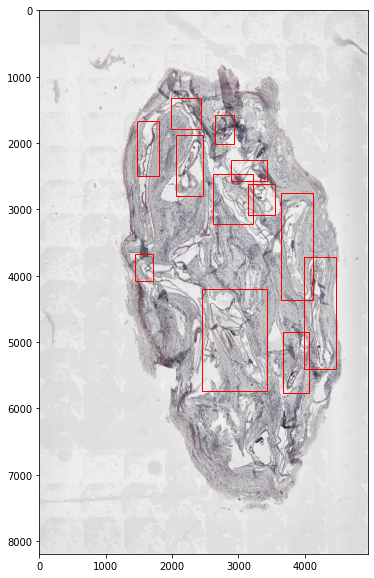

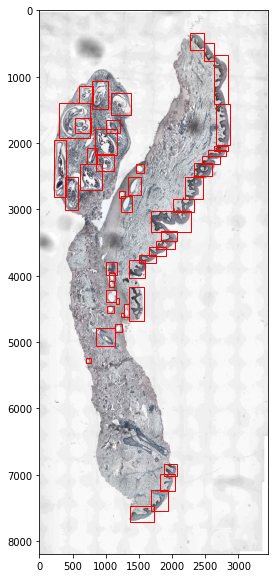

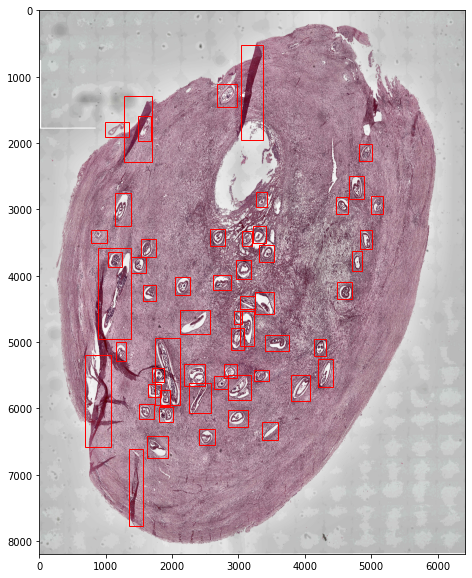

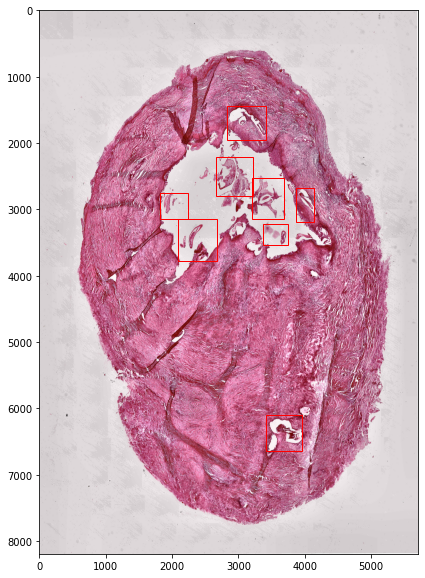

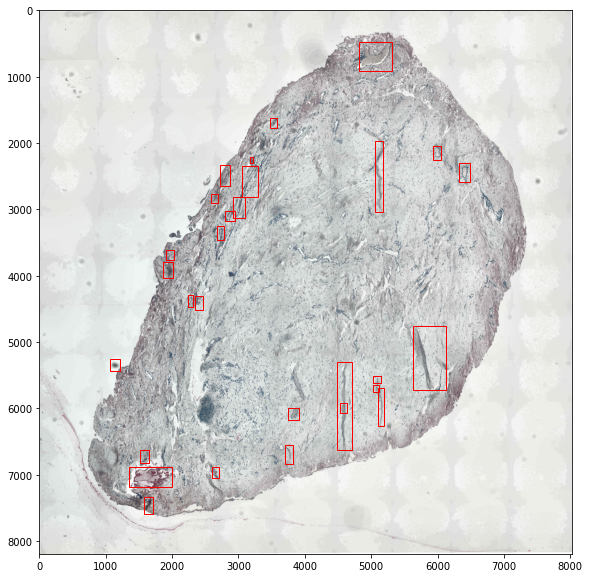

In [28]:
df=df_label_new
img_folder='MMDetection/data/jpgs'
save_folder='MMDetection/bbox_imgs'
suffix='our-bbox'
[draw_bbox(df,img_folder,i,save_folder,suffix) for i in img_bbox]

161_A-gdsc-bbox.jpg saved to MMDetection/bbox_imgs
14_D-gdsc-bbox.jpg saved to MMDetection/bbox_imgs
34_B-gdsc-bbox.jpg saved to MMDetection/bbox_imgs
124_B-gdsc-bbox.jpg saved to MMDetection/bbox_imgs
32_D-gdsc-bbox.jpg saved to MMDetection/bbox_imgs


[None, None, None, None, None]

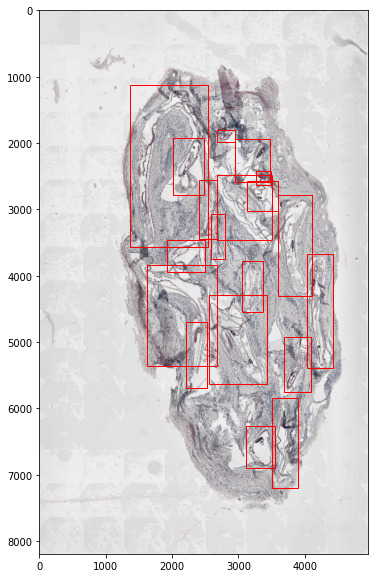

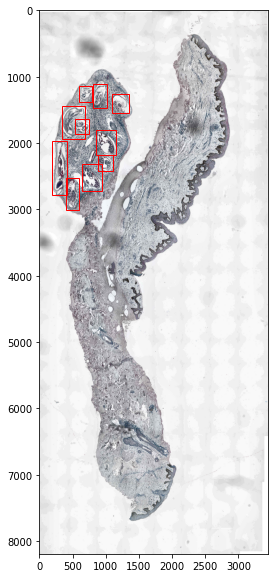

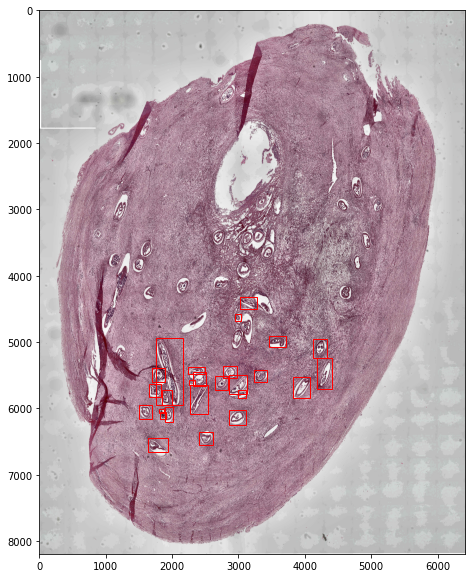

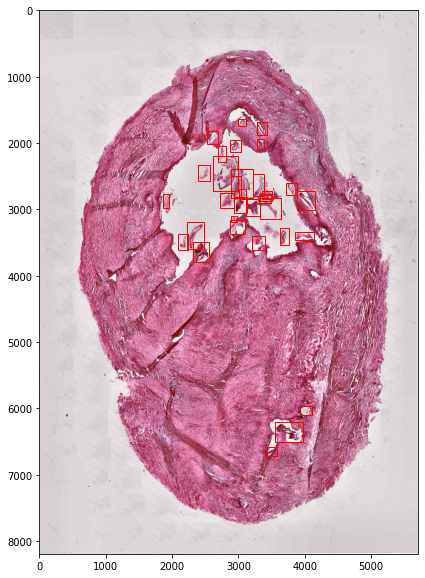

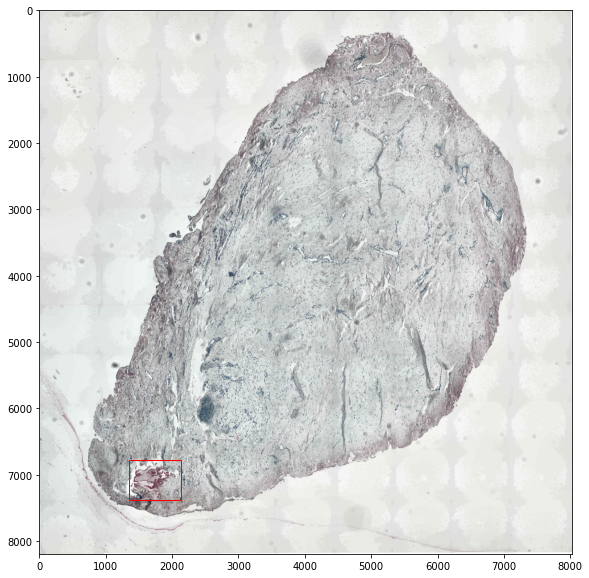

In [29]:
section_df=pd.read_csv('MMDetection/gdsc_train.csv', sep=';')

df=section_df
img_folder='MMDetection/data/jpgs'
save_folder='MMDetection/bbox_imgs'
suffix='gdsc-bbox'
[draw_bbox(df,img_folder,i,save_folder,suffix) for i in img_bbox]

In [16]:
%pwd

'/home/sagemaker-user/river-blindness/content/images'

In [9]:
root_path='/home/sagemaker-user/'

%cd {root_path}
folder_path='river-blindness/yolov5/test/images'

storage_path='river-blindness'
create_zip_file_from_folder(folder_path,storage_path,zip_file_name='zipped')

/home/sagemaker-user
zipped-2022-08-14--15-08-42.zip saved to river-blindness


In [10]:
root_path='/home/sagemaker-user/'
file_list=['zipped-2022-08-14--15-08-42.zip']
full_local_path=root_path+'river-blindness/'
s3_bucket_root_path='s3://sagemaker-studio-jna7gyyxsih/'
full_s3_path=s3_bucket_root_path+'mmdetection/'
copyFileToS3(file_list, full_local_path,full_s3_path)

upload: river-blindness/zipped-2022-08-14--15-08-42.zip to s3://sagemaker-studio-jna7gyyxsih/mmdetection/zipped-2022-08-14--15-08-42.zip
1 files copied to: s3://sagemaker-studio-jna7gyyxsih/mmdetection/ 


In [18]:
root_path='/home/sagemaker-user/'
source_path=root_path+'river-blindness/content/test-images/'
target_path=root_path+'MMDetection/data/originalJPGs/'
file_list=getAllFiles(source_path)
copy_file_list_to_folder(file_list,source_path,target_path)

73 files copied to: /home/sagemaker-user/MMDetection/data/originalJPGs/ 
